In [1]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
np.sort(os.listdir("../mistake/temp"))

array(['20230901_VIT_DESY3', '20230901_VIT_DESY3_double',
       '20230901_VIT_DESY3_half', '20230901_VIT_DESY3_half_twice',
       '20230901_VIT_DESY3_twice', '20230901_VIT_LSSTY1',
       '20230901_VIT_LSSTY10', '20230901_VIT_LSSTY10_half',
       '20230901_VIT_LSSTY10_half_twice', '20230901_VIT_LSSTY1_half',
       '20230901_VIT_LSSTY1_half_twice', '20230901_resnet_DESY3',
       '20230901_resnet_DESY3_double', '20230901_resnet_DESY3_half',
       '20230901_resnet_DESY3_half_twice', '20230901_resnet_DESY3_twice',
       '20230901_resnet_LSSTY1', '20230901_resnet_LSSTY10',
       '20230901_resnet_LSSTY10_half',
       '20230901_resnet_LSSTY10_half_twice',
       '20230901_resnet_LSSTY1_half', '20230901_resnet_LSSTY1_half_twice'],
      dtype='<U34')

# Vision Transformer

In [10]:
fold = "../mistake/temp"
def get_history_file(model_name):
    chkpts = os.listdir(f"{fold}/{model_name}")
    chkpts = [int(chkpt.split("-")[1]) for chkpt in chkpts if "checkpoint" in chkpt]
    highest_chkpt = max(chkpts)
    return f"{fold}/{model_name}/checkpoint-{highest_chkpt}/trainer_state.json"

In [11]:
run_name = "20230901_VIT_DESY3"
history_file = get_history_file(run_name)

if "twice" in run_name:
    best_epoch_to_checkpoint = 1 / 27
else:
    best_epoch_to_checkpoint = 1 / 14

with open(history_file, "r") as f:
    jsondata = json.load(f)
    best_metric = jsondata["best_metric"]
    best_model_checkpoint = jsondata["best_model_checkpoint"]
    best_epoch = int(int(best_model_checkpoint.split("-")[1]) * best_epoch_to_checkpoint)
    print(best_metric, best_model_checkpoint, best_epoch)
    
    history = jsondata["log_history"]
    vit_epochs = np.array([entry["epoch"] for entry in history])
    vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])

-1.029784917831421 ./new/temp/20230901_VIT_DESY3/checkpoint-280 20


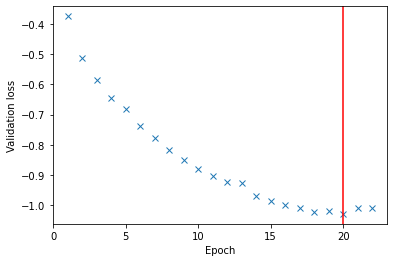

In [12]:
plt.figure()
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none")
plt.axvline(best_epoch, color="red")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

20230901_VIT_DESY3
-1.029784917831421 ./new/temp/20230901_VIT_DESY3/checkpoint-280 20
20230901_VIT_DESY3_double
-1.103092908859253 ./new/temp/20230901_VIT_DESY3_double/checkpoint-252 18
20230901_VIT_DESY3_half
-1.0312156677246094 ./new/temp/20230901_VIT_DESY3_half/checkpoint-280 20
20230901_VIT_DESY3_half_twice
-1.1019783020019531 ./new/temp/20230901_VIT_DESY3_half_twice/checkpoint-351 13
20230901_VIT_DESY3_twice
-1.057607650756836 ./new/temp/20230901_VIT_DESY3_twice/checkpoint-243 9


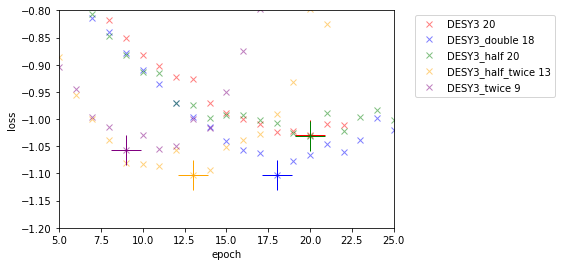

In [14]:
plt.figure()
colors = ["red", "blue", "green", "orange", "purple", \
            "cyan", "magenta", "yellow", "black", "brown"]
for run_name, color in zip(np.sort(os.listdir(fold)), colors):
    if "VIT" not in run_name:
        continue
    if "DESY3" not in run_name:
        continue
    print(run_name)
    history_file = get_history_file(run_name)

    if "twice" in run_name:
        best_epoch_to_checkpoint = 1 / 27
    else:
        best_epoch_to_checkpoint = 1 / 14

    with open(history_file, "r") as f:
        jsondata = json.load(f)
        best_metric = jsondata["best_metric"]
        best_model_checkpoint = jsondata["best_model_checkpoint"]
        best_epoch = int(int(best_model_checkpoint.split("-")[1]) * best_epoch_to_checkpoint)
        print(best_metric, best_model_checkpoint, best_epoch)
        
        history = jsondata["log_history"]
        vit_epochs = np.array([entry["epoch"] for entry in history])
        vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])
    plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", alpha=0.5,\
             label=run_name[run_name.index("VIT_")+4:] + " " + str(best_epoch), color=color)
    plt.plot(best_epoch, best_metric, marker="+", ls="none", color=color, markersize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(5, 25)
plt.ylim(-1.2, -0.8)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.close()

# ResNet

In [31]:
np.sort(os.listdir("../new/temp")), len(os.listdir("../new/temp"))

(array(['20230901_VIT_DESY3', '20230901_VIT_DESY3_double',
        '20230901_VIT_DESY3_half', '20230901_VIT_DESY3_half_twice',
        '20230901_VIT_DESY3_twice', '20230901_VIT_LSSTY1',
        '20230901_VIT_LSSTY10', '20230901_VIT_LSSTY10_half',
        '20230901_VIT_LSSTY10_half_twice', '20230901_VIT_LSSTY1_half',
        '20230901_VIT_LSSTY1_half_twice', '20230901_resnet_DESY3',
        '20230901_resnet_DESY3_double', '20230901_resnet_DESY3_half',
        '20230901_resnet_DESY3_half_twice', '20230901_resnet_DESY3_twice',
        '20230901_resnet_LSSTY1', '20230901_resnet_LSSTY10',
        '20230901_resnet_LSSTY10_half',
        '20230901_resnet_LSSTY10_half_twice',
        '20230901_resnet_LSSTY1_half', '20230901_resnet_LSSTY1_half_twice'],
       dtype='<U34'),
 22)

In [39]:
def get_history_file(model_name):
    # return glob.glob(f'../temp/{model_name}/*logs*')
    return glob.glob(f'../new/temp/{model_name}/*logs*')

In [46]:
# history_files = get_history_file("20230813_cnn_DES")
history_files = get_history_file("20230901_resnet_LSSTY10_half")

rn_val_loss = []
rn_epochs = []
for history_file in history_files:
    with open(history_file, "r") as f:
        for line in f.readlines():
            if not "Val Loss" in line:
                continue
            rn_val_loss += [float(line.split()[-1])]
            rn_epochs += [int(line.split()[1])]

best_epoch = rn_epochs[np.argmin(rn_val_loss)]

len(rn_epochs), len(rn_val_loss), best_epoch

(7, 7, 4)

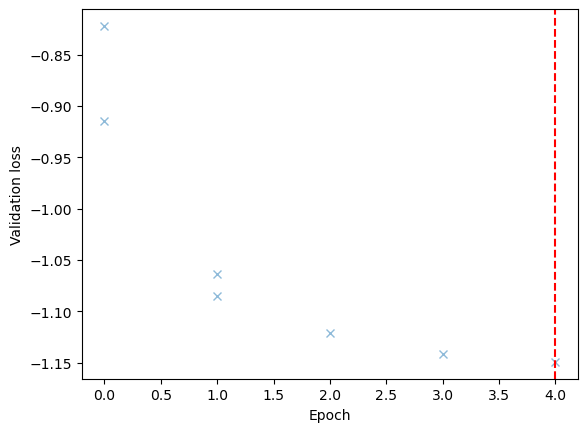

In [47]:
plt.figure()
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", alpha=0.5)
plt.axvline(x=best_epoch, color="red", ls="--", label="Best epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

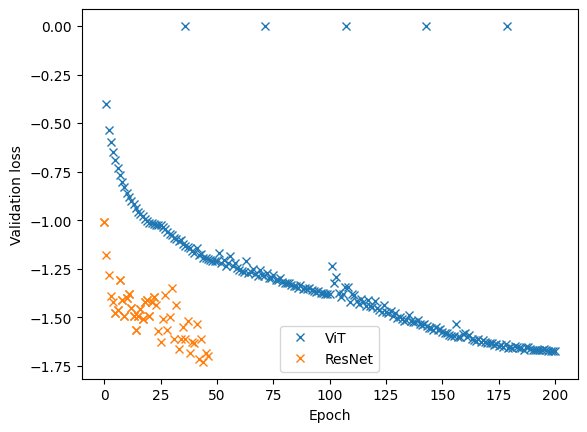

In [17]:
plt.figure
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", label="ViT")
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", label="ResNet")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()
plt.close()